In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes

In [3]:
#openFood = pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t', low_memory=False, nrows = 600000 )
openFood = pd.read_csv("fr.openfoodfacts.org.product_nettoye.csv", sep='\t', low_memory=False)
openFood.head(5)

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-lauric-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,-erucic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,somme_100,energy-kj_100g_pred,fat_100g_pred,saturated-fat_100g_pred,sugars_100g_pred,proteins_100g_pred,salt_100g_pred,sodium_100g_pred,nutriscore_score_pred
0,0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:38:00+00:00,2019-06-25 11:55:18,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,1568.250,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,1.40,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# analyse univariée

## analyse energy-kj

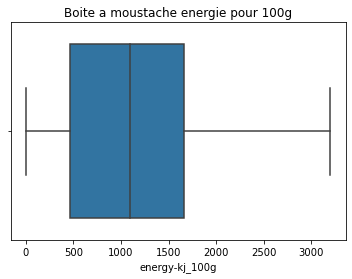

In [4]:
sns.boxplot(x='energy-kj_100g', data = openFood)
plt.title('Boite a moustache energie pour 100g')
plt.savefig('energy-kj_fr_boxplot.jpg', bbox_inches='tight')
plt.show()

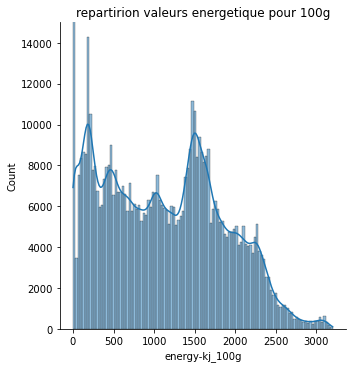

In [5]:
sns.displot(openFood['energy-kj_100g'], kde = True)
plt.ylim(0, 15000)
plt.title('repartirion valeurs energetique pour 100g')
plt.savefig('energy-kj_fr.jpg', bbox_inches='tight')
plt.show()

In [6]:
openFood['energy-kj_100g'].describe()

count    577742.000000
mean       1116.445660
std         736.607294
min           0.000000
25%         460.020000
50%        1095.684000
75%        1660.254000
max        3200.000000
Name: energy-kj_100g, dtype: float64

## analyse autres variables

In [7]:
def plot_univ(df,colonne,label, ylim):
    print(f'analyse univariée colonne {colonne}')
    print(f'moyenne : {openFood[colonne].mean()}')
    print(f'ecart type : {openFood[colonne].std()}')
    print(f'min : {openFood[colonne].min()}')
    print(f'25% : {openFood[colonne].quantile(0.25)}')
    print(f'50% : {openFood[colonne].quantile(0.5)}')
    print(f'75% : {openFood[colonne].quantile(0.75)}')
    print(f'max : {openFood[colonne].max()}')

    sns.boxplot(x=colonne, data = openFood)
    plt.title('Boite a moustache '+label+' pour 100g')
    file = label+'_boxplot.jpg'
    plt.savefig(file, bbox_inches='tight')
    plt.show()    

    sns.displot(openFood[colonne], kde = True)
    plt.ylim(0, ylim)
    plt.title('repartition '+label+' pour 100g')
    file = label+'_dist.jpg'
    plt.savefig(file, bbox_inches='tight')
    plt.show()


analyse univariée colonne fat_100g
moyenne : 13.020288644140418
ecart type : 14.827840212717595
min : 0.0
25% : 1.0
50% : 7.5
75% : 21.89999961853
max : 100.0


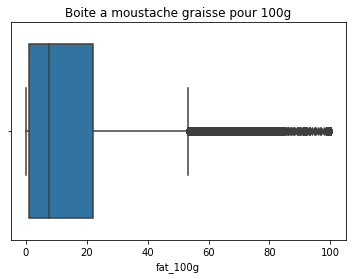

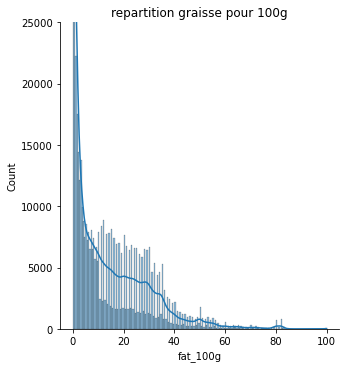

In [8]:
plot_univ(openFood,'fat_100g','graisse',25000)

analyse univariée colonne proteins_100g
moyenne : 8.87284330685348
ecart type : 9.959548408189647
min : 0.0
25% : 1.6
50% : 6.2
75% : 12.6
max : 100.0


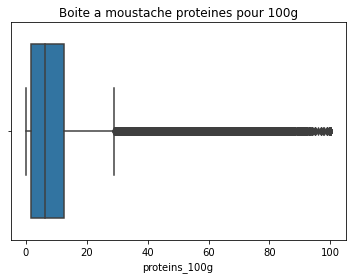

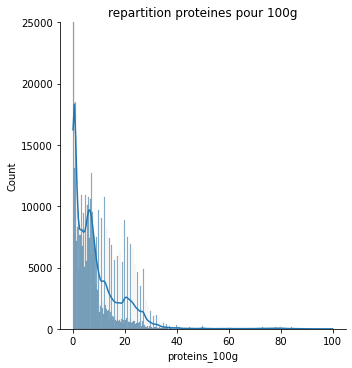

In [9]:
plot_univ(openFood,'proteins_100g','proteines',25000)

analyse univariée colonne sugars_100g
moyenne : 14.140704683218486
ecart type : 20.241776218401053
min : 0.0
25% : 0.7
50% : 3.8
75% : 20.9
max : 100.0


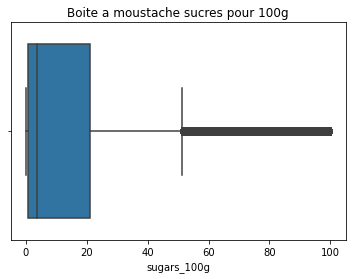

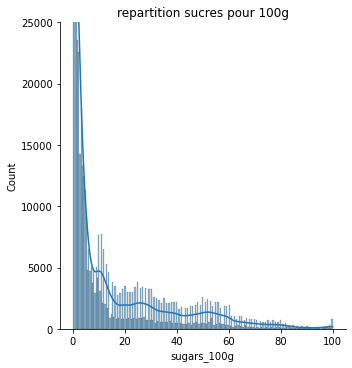

In [10]:
plot_univ(openFood,'sugars_100g','sucres',25000)

analyse univariée colonne fiber_100g
moyenne : 3.0574215534667157
ecart type : 5.007409192533293
min : 0.0
25% : 0.1
50% : 1.7
75% : 3.8
max : 100.0


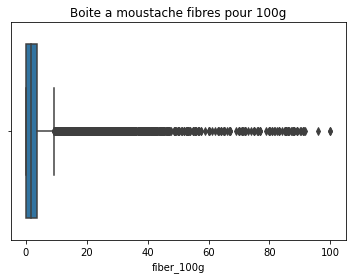

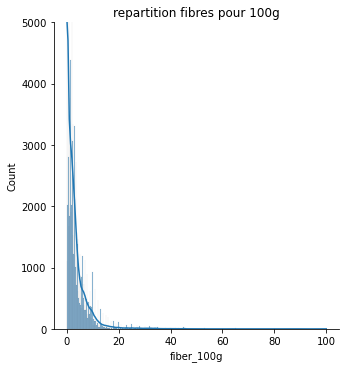

In [11]:
plot_univ(openFood,'fiber_100g','fibres',5000)

analyse univariée colonne saturated-fat_100g
moyenne : 5.230723093761819
ecart type : 7.464104081048889
min : 0.0
25% : 0.2
50% : 1.95
75% : 7.6
max : 100.0


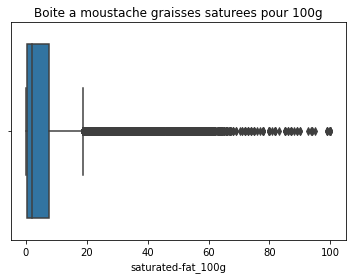

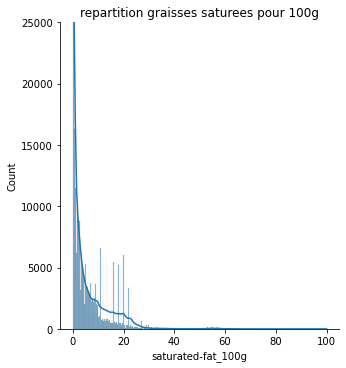

In [12]:
plot_univ(openFood,'saturated-fat_100g','graisses saturees',25000)

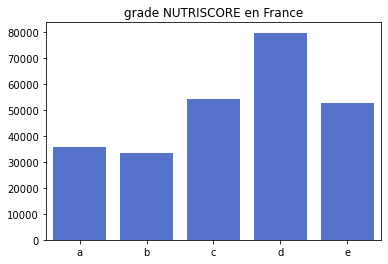

In [13]:
df = openFood['nutriscore_grade'].value_counts().sort_index()
sns.barplot(x=df.index, y= df.values, color='royalblue')
plt.title('grade NUTRISCORE en France')
plt.savefig('nutriscore_grade_fr.jpg', bbox_inches='tight')
plt.show()

In [14]:
openFood['nutriscore_score'].describe()

count    577742.000000
mean          7.875167
std           7.719364
min         -15.000000
25%           1.000000
50%           6.000000
75%          14.000000
max          40.000000
Name: nutriscore_score, dtype: float64

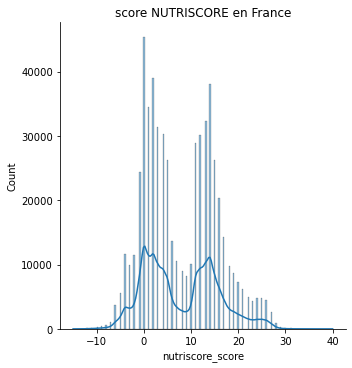

In [15]:
sns.displot(openFood['nutriscore_score'], kde = True)
plt.title('score NUTRISCORE en France')
plt.savefig('nutriscore_score_fr.jpg', bbox_inches='tight')
plt.show()

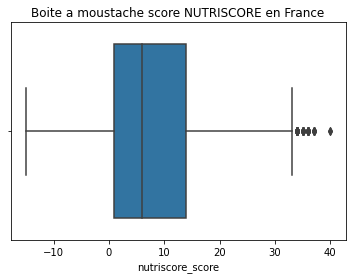

In [16]:
sns.boxplot(x='nutriscore_score', data = openFood)
plt.title('Boite a moustache score NUTRISCORE en France')
plt.savefig('nutriscore_score_fr_boxplot.jpg', bbox_inches='tight')
plt.show()

In [17]:
openFood['nova_group'] = openFood['nova_group'].astype('category')

In [18]:
openFood[['nutriscore_grade','nova_group']].notna().sum()

nutriscore_grade    255711
nova_group          174284
dtype: int64

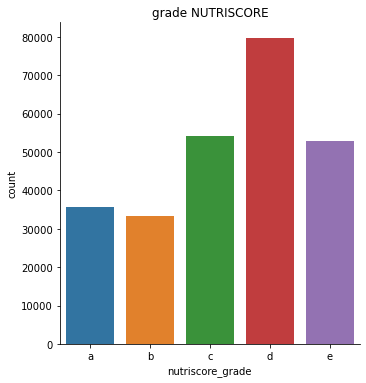

In [19]:
sns.catplot(x='nutriscore_grade', kind='count',data = openFood, order= ['a','b','c','d','e'])
plt.title('grade NUTRISCORE')
plt.savefig('nutriscore_grade_catplot.jpg', bbox_inches='tight')
plt.show()

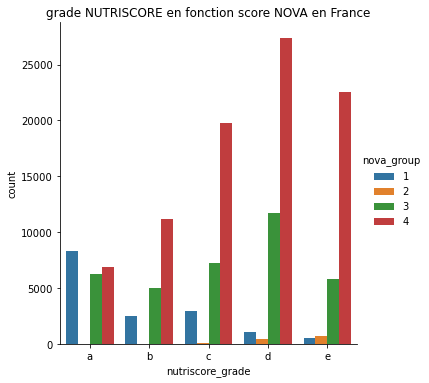

In [20]:
sns.catplot(x='nutriscore_grade', kind='count',data = openFood, hue='nova_group', order= ['a','b','c','d','e'], hue_order = [1,2,3,4])
plt.title('grade NUTRISCORE en fonction score NOVA en France')
plt.savefig('nutriscore_grade_fr_NOVA_catplot.jpg', bbox_inches='tight')
plt.show()

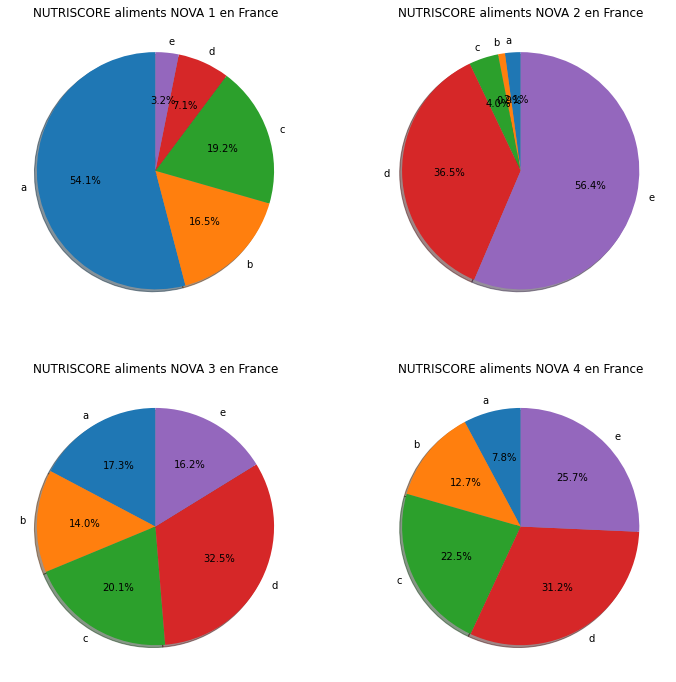

In [21]:
plt.rcParams["figure.figsize"]=[12,12]

plt.subplot(221)
data=openFood[openFood['nova_group']==1]['nutriscore_grade'].value_counts().sort_index()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('NUTRISCORE aliments NOVA 1 en France')

plt.subplot(222)
data=openFood[openFood['nova_group']==2]['nutriscore_grade'].value_counts().sort_index()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('NUTRISCORE aliments NOVA 2 en France')

plt.subplot(223)
data=openFood[openFood['nova_group']==3]['nutriscore_grade'].value_counts().sort_index()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('NUTRISCORE aliments NOVA 3 en France')

plt.subplot(224)
data=openFood[openFood['nova_group']==4]['nutriscore_grade'].value_counts().sort_index()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('NUTRISCORE aliments NOVA 4 en France')

plt.savefig('nutriscore_score_fr_NOVA_pieplot.jpg', bbox_inches='tight')
plt.show()

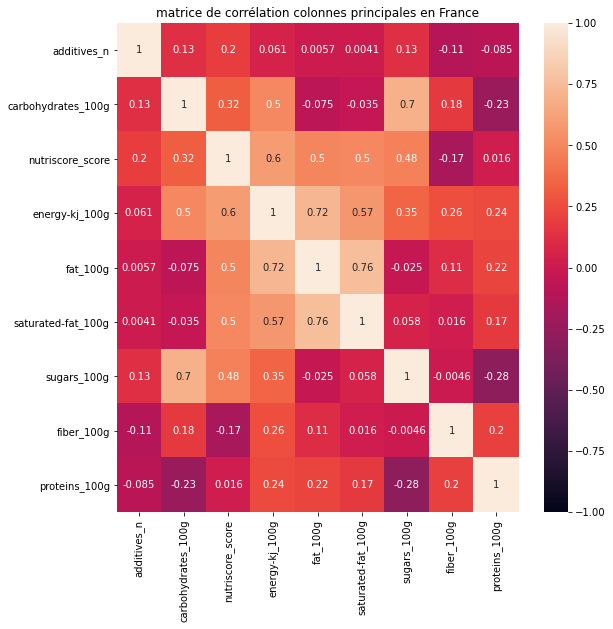

In [22]:
plt.rcParams["figure.figsize"]=[9,9]
data = openFood[['additives_n','carbohydrates_100g','nutriscore_score','nova_group','energy-kj_100g','fat_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g']]
sns.heatmap(data.corr(), vmin=-1, vmax=1,annot=True,)
plt.title('matrice de corrélation colonnes principales en France')
plt.savefig('heatmap_fr.jpg', bbox_inches='tight')
plt.show()

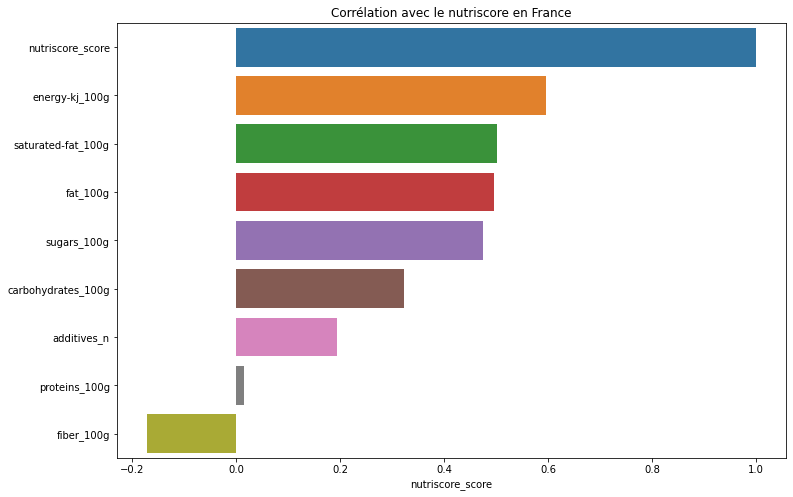

In [23]:
df_corr = data.corr()
corr_nutri = df_corr.sort_values('nutriscore_score',ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_nutri['nutriscore_score'], y=corr_nutri.index)
plt.title('Corrélation avec le nutriscore en France')
plt.savefig('corr_nutriscore_fr.jpg', bbox_inches='tight')
plt.show()

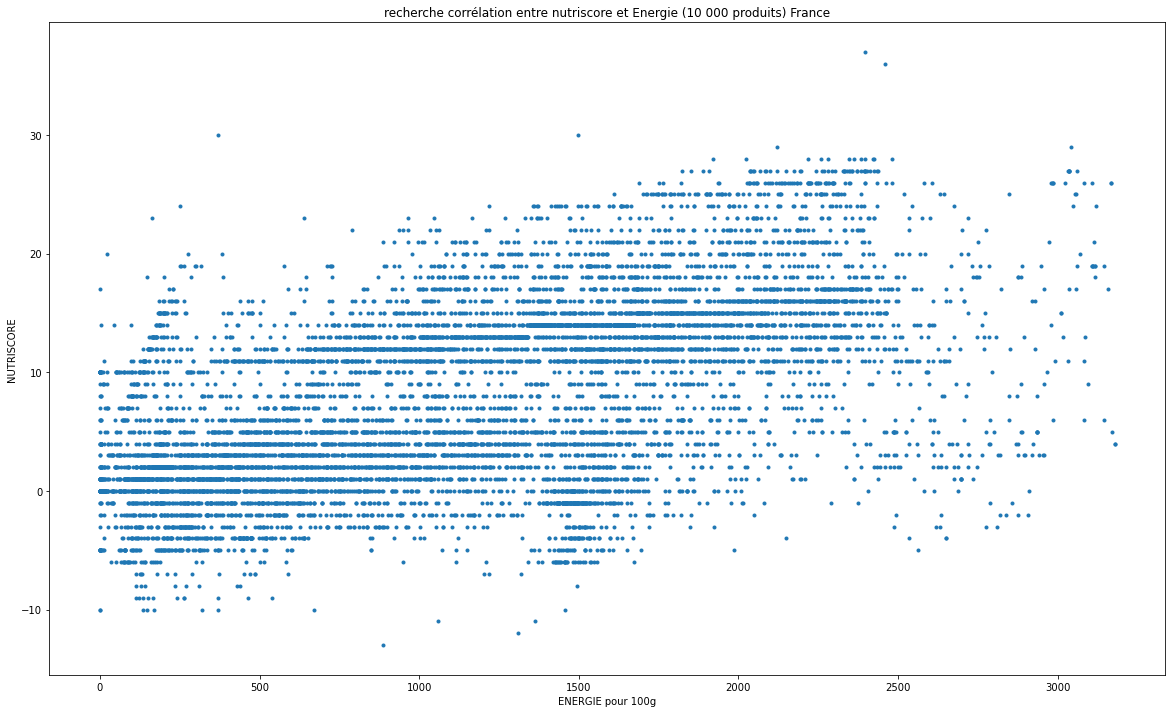

In [40]:
df=openFood.sample(10000)
plt.figure(figsize=[20,12])
plt.plot(df['energy-kj_100g'],df['nutriscore_score'], linestyle='', marker='.')
plt.title('recherche corrélation entre nutriscore et Energie (10 000 produits) France')
plt.xlabel("ENERGIE pour 100g")
plt.ylabel("NUTRISCORE")
plt.savefig('rech_corr_nutriscore_energy_fr.jpg', bbox_inches='tight')
plt.show()

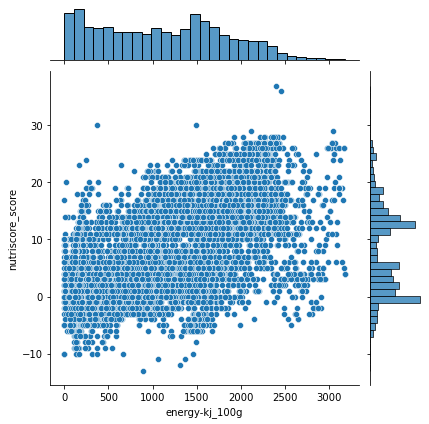

In [41]:
sns.jointplot(x='energy-kj_100g',y='nutriscore_score', data = df)
#plt.title('recherche corrélation entre nutriscore et graisse saturée (10 000 produits) France')
plt.savefig('rech_corr_nutriscore_energy-kj_fr_jointplot.jpg', bbox_inches='tight')
plt.show()

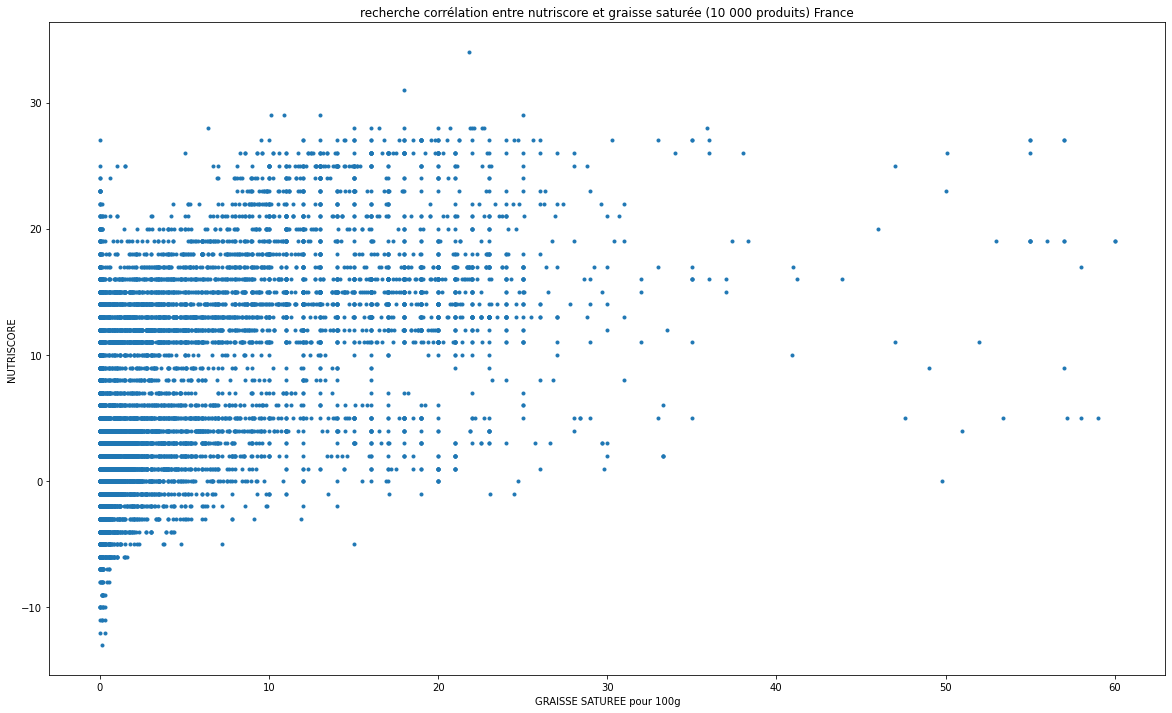

In [33]:
df=openFood.sample(10000)
plt.figure(figsize=[20,12])
plt.plot(df['saturated-fat_100g'],df['nutriscore_score'], linestyle='', marker='.')
plt.title('recherche corrélation entre nutriscore et graisse saturée (10 000 produits) France')
plt.xlabel("GRAISSE SATUREE pour 100g")
plt.ylabel("NUTRISCORE")
plt.savefig('rech_corr_nutriscore_saturated-fat_fr.jpg', bbox_inches='tight')
plt.show()

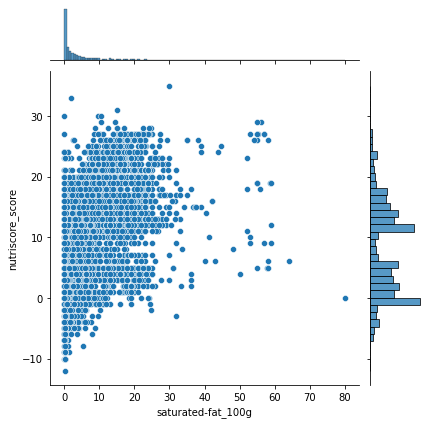

In [27]:
sns.jointplot(x='saturated-fat_100g',y='nutriscore_score', data = df)
#plt.title('recherche corrélation entre nutriscore et graisse saturée (10 000 produits) France')
plt.savefig('rech_corr_nutriscore_saturated-fat_fr_jointplot.jpg', bbox_inches='tight')
plt.show()

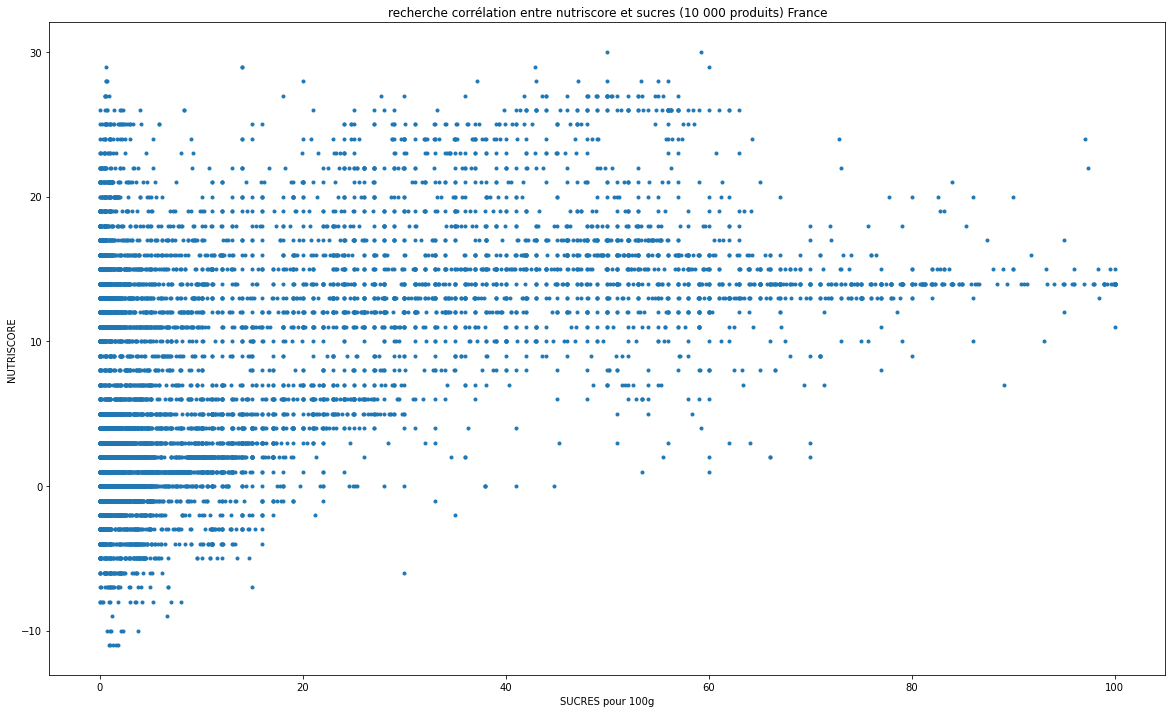

In [34]:
df=openFood.sample(10000)
plt.figure(figsize=[20,12])
plt.plot(df['sugars_100g'],df['nutriscore_score'], linestyle='', marker='.')
plt.title('recherche corrélation entre nutriscore et sucres (10 000 produits) France')
plt.xlabel("SUCRES pour 100g")
plt.ylabel("NUTRISCORE")
plt.savefig('rech_corr_nutriscore_sugars_fr.jpg', bbox_inches='tight')
plt.show()

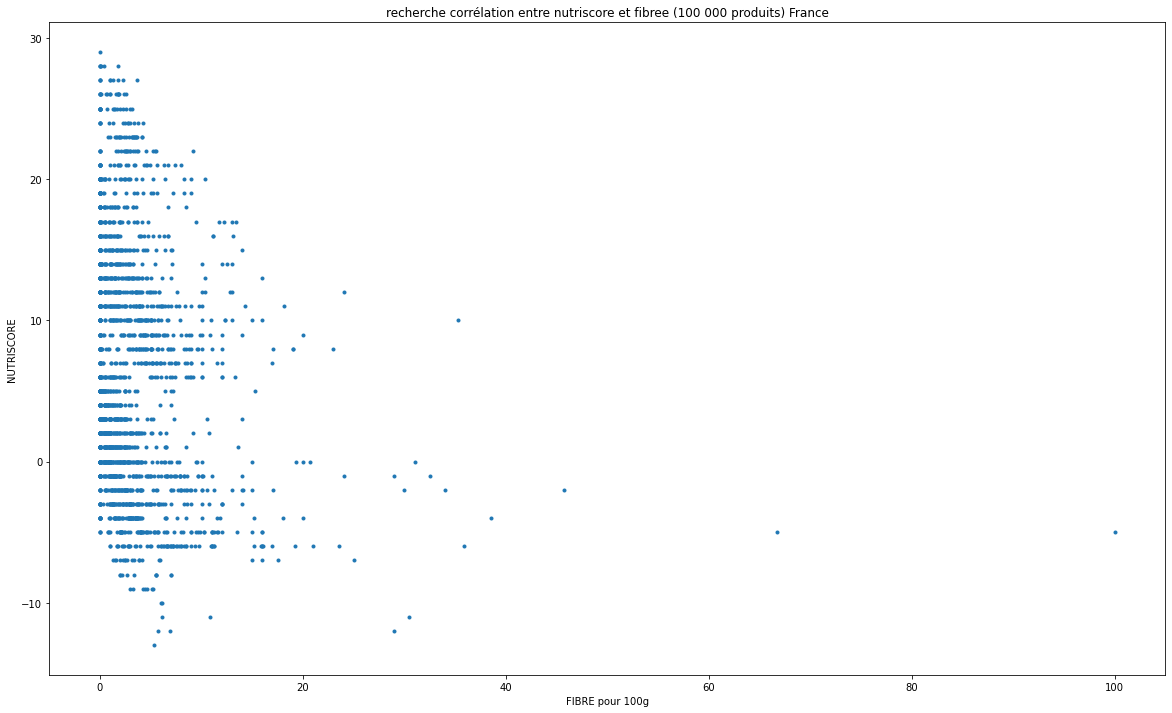

In [42]:
df=openFood.sample(10000)
plt.figure(figsize=[20,12])
plt.plot(df['fiber_100g'],df['nutriscore_score'], linestyle='', marker='.')
plt.title('recherche corrélation entre nutriscore et fibree (100 000 produits) France')
plt.xlabel("FIBRE pour 100g")
plt.ylabel("NUTRISCORE")
plt.savefig('rech_corr_nutriscore_fiber_fr.png')
plt.show()

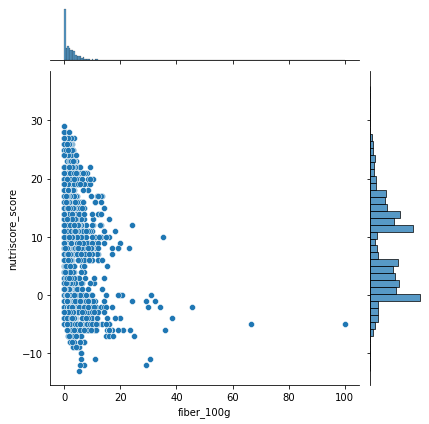

In [43]:
sns.jointplot(x='fiber_100g',y='nutriscore_score', data = df)
#plt.title('recherche corrélation entre nutriscore et graisse saturée (10 000 produits) France')
plt.savefig('rech_corr_nutriscore_fiber_jointplot.jpg', bbox_inches='tight')
plt.show()

# observations

In [44]:

colonnes_travail = ['code','created_datetime', 'product_name','categories','ingredients_text','quantity', 
       'nutriscore_score','nutriscore_grade','nova_group', 'energy-kj_100g', 'energy-kcal_100g',
       'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g']

openFood[colonnes_travail].sort_values(by=['nutriscore_score','nova_group']).head()

,code,created_datetime,product_name,categories,ingredients_text,quantity,nutriscore_score,nutriscore_grade,nova_group,energy-kj_100g,energy-kcal_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
194306,3263859883713,2018-02-18 16:05:31+00:00,Fonds artichauts,"Aliments et boissons à base de végétaux, Alime...","[""Fonds d'artichauts.""]",NaN,-15.0,a,1.0,175.6440,42.0,1.000,2.5,8.3,18.0,0.0000
39955,05012343,2018-04-18 09:20:44+00:00,Asperge Blanches des sables des Landes,"Aliments et boissons à base de végétaux, Alime...",['Asperges blanches fraîches des sables des La...,500 g,-15.0,a,NaN,306.5406,73.3,0.733,0.0,20.0,9.0,0.0254
161424,3248451031069,2018-02-15 17:12:17+00:00,"Flageolets Extras Fins, 1 Kilo, Marque D'aucy","Aliments et boissons à base de végétaux, Alime...",['Flageolets vert extra-fins'],1 kg,-14.0,a,1.0,602.2080,144.0,0.700,2.3,8.3,9.2,0.2250
201369,3270160103713,2015-02-28 18:18:43+00:00,Fèves pelées,"Aliments et boissons à base de végétaux, Alime...",['Fève pelée'],450 g,-14.0,a,1.0,397.2900,95.0,0.600,0.4,5.4,8.7,0.0300
201891,3270160595488,2018-03-29 18:33:25+00:00,Mogette de Vendée,"Aliments et boissons à base de végétaux, Alime...",['Mogette'],600.0 g,-14.0,a,1.0,656.5740,157.0,0.900,3.5,14.0,11.0,0.0100


## recheche multicritere 
- nutriscore a 
- contient fraise
- proteines

In [45]:
# recherche aliments sportif prise de mass
filter_fraise = openFood['ingredients_text'].fillna('0').str.contains('fraise')
filter_nutriscore = (openFood['nutriscore_grade'].isin(['a','b'])) | (openFood['nutriscore_score']< 3)
filter_nova = openFood['nova_group'].isin([1.0,2.0,3.0])
openFood[filter_fraise & filter_nova & filter_nutriscore][colonnes_travail].sort_values('proteins_100g', ascending=False).head(15)

,code,created_datetime,product_name,categories,ingredients_text,quantity,nutriscore_score,nutriscore_grade,nova_group,energy-kj_100g,energy-kcal_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
156346,3229820794556,2017-03-28 19:09:11+00:00,Muesli Protéinés Soja Dattes,"Aliments et boissons à base de végétaux, Alime...","['Flocons de soja* 33%', "" flocons d'avoine 26...",375 g,-3.0,a,3.0,1597.524,382.0,12.0,11.0,13.0,21.0,0.03
255208,3396411218903,2017-02-26 16:06:34+00:00,Muesli envie de soleil,"Aliments et boissons à base de végétaux, Alime...","[""Flocon d'avoine complets (66.4%)"", ' flocon ...",NaN,-6.0,a,1.0,1555.704,372.0,7.2,2.9,10.8,13.1,0.10
156135,3229820787879,2015-03-05 07:30:41+00:00,muesli ensoleillé fruit d'été,"Aliments et boissons à base de végétaux, Alime...","[""Flocons d'_avoine_ complets 66"", '4%', ' flo...",375 g,-6.0,a,1.0,1567.000,NaN,7.2,2.9,10.8,13.1,0.10
572464,9004617068409,2019-05-19 09:40:45+00:00,Power Muesli Fraises et Griottes,"Aliments et boissons à base de végétaux, Alime...","[""Flocons d'avoine complète* 60 %"", ' dattes h...",NaN,1.0,b,3.0,1706.256,408.0,14.0,7.3,NaN,13.0,0.09
363272,3760103003434,2016-03-28 08:48:18+00:00,Muesli au Lait - Framboise - Fraise - Figue,"Aliments et boissons à base de végétaux, Alime...","['Flocons de céréales 63 % (flocons de BLE', ""...",80g,2.0,b,3.0,1564.068,374.0,6.0,0.0,NaN,12.9,0.72
156345,3229820794549,2017-04-12 18:35:19+00:00,Muesli Fibres SON de BLE FIGUES PRUNEAUX,fr:Mueslis aux fruits,"[""Flocons d'avoine* 31 %"", ' flocons de seigle...",375g,-5.0,a,1.0,1438.608,344.0,6.0,9.0,16.0,12.0,0.02
156502,3229820797953,2019-03-19 17:10:05+00:00,Muesli Superfruits,"Aliments et boissons à base de végétaux, Alime...","[""Flocons d'avoine* sans gluten 82"", '6%', ' f...",375 g,-5.0,a,3.0,1526.430,365.0,5.7,6.6,8.8,12.0,0.10
490903,7613356111189,2016-04-16 21:28:25+00:00,Porridge aux baies sans sucres ajoutés,"Aliments et boissons à base de végétaux, Alime...","['flocons d’_avoine_ (Europe)', ' flocons de f...",320 g,-4.0,a,1.0,1590.000,NaN,6.0,12.0,9.0,12.0,0.02
178088,3256226400736,2018-04-22 08:28:10+00:00,Porridge aux fruits rouges,Porridge with fruits,"[""Flocons d'AVOINE complets 82%"", ' fruits rou...",55 g,-3.0,a,3.0,1542.000,366.0,7.9,11.0,9.6,12.0,0.02
255311,3396411225451,2016-11-06 06:55:03+00:00,Flocons De Céréales,"Aliments et boissons à base de végétaux, Alime...","[""flocons d'avoine 90.5%"", ' figues séchées 4%...",375 g,-5.0,a,3.0,1522.248,364.0,6.2,6.1,10.0,12.0,0.01


resultat visible aux URLS : <BR>
<BR>https://fr.openfoodfacts.org/produit/3229820794556/muesli-proteines-soja-dattes-bjorg
<BR>https://fr.openfoodfacts.org/produit/3396411218903/muesli-envie-de-soleil-evernat
<BR>https://fr.openfoodfacts.org/produit/9004617068409/power-muesli-fraises-griottes-verival

## rechercher regime femme enceinte
données certainement insuffisante

In [46]:
openFood['vitamin-b12_100g'].notna().sum()/len(openFood)*100

0.26084307528273865

In [47]:
openFood['calcium_100g'].notna().sum()/len(openFood)*100

1.3831433407991802

In [48]:
openFood['iron_100g'].notna().sum()/len(openFood)*100

0.8919206150842417

In [49]:
openFood[(openFood['vitamin-b12_100g'].notna()) & filter_nutriscore].sort_values('vitamin-b12_100g',ascending = False).head(10)

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-lauric-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,-erucic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,somme_100,energy-kj_100g_pred,fat_100g_pred,saturated-fat_100g_pred,sugars_100g_pred,proteins_100g_pred,salt_100g_pred,sodium_100g_pred,nutriscore_score_pred
42919,335391,0674491111776,http://world-en.openfoodfacts.org/product/0674...,kiliweb,2018-08-06 10:44:16,2018-08-06 10:44:16+00:00,2020-05-21 04:09:18,2020-05-21 04:09:18+00:00,Dessert Au Chocolat Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Desserts, Desserts végétaliens","en:desserts,en:non-dairy-desserts","Desserts,Non-dairy desserts",NaN,NaN,NaN,NaN,NaN,"Sans gluten,Sans lactose","en:gluten-free,en:no-lactose","Gluten-free,No lactose",NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,125g,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,b,NaN,Sugary snacks,Sweets,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:non-dairy-desserts,Non-dairy desserts,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,htt

In [50]:
openFood[(openFood['iron_100g'].notna()) & filter_nutriscore].sort_values('iron_100g',ascending = False).head(10)

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-lauric-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,-erucic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,somme_100,energy-kj_100g_pred,fat_100g_pred,saturated-fat_100g_pred,sugars_100g_pred,proteins_100g_pred,salt_100g_pred,sodium_100g_pred,nutriscore_score_pred
488833,1295959,7613036212823,http://world-en.openfoodfacts.org/product/7613...,waistline-app,2018-09-27 05:02:54,2018-09-27 05:02:54+00:00,2021-02-05 09:43:56,2021-02-05 09:43:56+00:00,Nesquik 30% weniger Zucker,NaN,NaN,450 g,Kunststoff,kunststoff,NaN,Nestlé,nestle,"Getränke, Imbiss, Süßwaren, Frühstücke, Schoko...","en:beverages,en:snacks,en:sweet-snacks,en:brea...","Beverages,Snacks,Sweet snacks,Breakfasts,Choco...",NaN,NaN,NaN,Frankfurt,frankfurt,"Low or no sugar, Low sugar, Reduced sugar, 30%...","en:low-or-no-sugar,en:low-sugar,en:reduced-sug...","Low or no sugar,Low sugar,Reduced sugar,30% le...",NaN,NaN,NaN,NaN,NaN,NaN,"Frankreich, Deutschland, en:ch","en:france,en:germany,en:switzerland","France,Germany,Switzerland","['28 % fettarmer Kakao*', ' lösliche Mais-Ball...",NaN,NaN,NaN,NaN,100g,100.000,1.0,NaN,en:e322,['E322 - Lecithins'],0.0,NaN,0.0,NaN,-1.0,NaN,4.0,Sugary snacks,Chocolate products,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be complet

## recherche regime sans sel et minimum sucre

In [51]:
# recherche aliments sportif prise de mass
filter_nutriscore = (openFood['nutriscore_grade'].isin(['a','b'])) | (openFood['nutriscore_score']< 3)
filter_nova = openFood['nova_group'].isin([1.0,2.0,3.0])
filter_salt = openFood['salt_100g'].notna()
openFood[ filter_nutriscore & filter_nova & filter_salt][colonnes_travail].sort_values(['salt_100g','sugars_100g'], ascending=True).head(25)

,code,created_datetime,product_name,categories,ingredients_text,quantity,nutriscore_score,nutriscore_grade,nova_group,energy-kj_100g,energy-kcal_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
1097,00088978,2017-03-14 18:59:00+00:00,Fresh Drinking Coconut,"Plant-based foods and beverages, Beverages, Pl...",['Coconut water'],1 pièce,-6.0,b,1.0,96.186,23.0,0.10,0.0,NaN,0.13,0.0
1866,0014800582260,2019-12-30 17:50:14+00:00,100% juice from concentrate,"Plant-based foods and beverages, Beverages, Pl...","['lemon juice from concentrate (water', ' conc...",NaN,0.0,b,3.0,0.000,0.0,0.00,0.0,NaN,0.00,0.0
2683,0020717812055,2017-06-03 09:33:05+00:00,Huile De Sésame 190ml,Matières grasses,['HUILE DE SÉSAME'],NaN,2.0,b,2.0,501.840,120.0,14.00,0.0,0.00,0.00,0.0
3925,0030000041703,2017-05-07 16:21:59+00:00,Quaker Grits Quick 5-Minute 24 Ounce Canister,"Plant-based foods and beverages, Plant-based f...","['white hominy grits made from corn', ' niacin...",NaN,-3.0,a,1.0,1530.612,366.0,1.22,0.0,2.40,9.76,0.0
4760,0036192122152,2020-02-01 23:27:51+00:00,Pure lemon juice,"Plant-based foods and beverages, Beverages, Pl...",['Organic lemon juice.'],NaN,-10.0,b,1.0,0.000,0.0,0.00,0.0,NaN,0.00,0.0
4761,0036192122169,2019-08-04 04:52:51+00:00,Organic lime juice,"Plant-based foods and beverages, Beverages, Pl...",['Organic lime juice.'],NaN,-10.0,b,1.0,0.000,0.0,0.00,0.0,NaN,0.00,0.0
4763,0036192122671,2020-02-21 12:47:23+00:00,"100% pure lemon juice, lemon","Plant-based foods and beverages, Beverages, Pl...",['Organic lemon juice.'],NaN,-10.0,b,1.0,0.000,0.0,0.00,0.0,NaN,0.00,0.0
5376,0039978001436,2018-09-15 17:51:23+00:00,High fiber oat bran hot cereal,"Plant-based foods and beverages, Plant-based f...",['Oat bran.'],510g,-5.0,a,1.0,1568.250,375.0,5.00,0.0,17.50,17.50,0.0
5382,0039978008442,2018-11-20 13:41:10+00:00,Organic whole chia seeds,"Plant-based foods and beverages, Plant-based f...",['Organic whole chia seeds.'],12 oz,-3.0,a,1.0,2091.000,500.0,26.92,0.0,38.50,23.08,0.0
5386,0039978019547,2018-07-27 02:48:02+00:00,Organic rolled oats whole grain,"Plant-based foods and beverages, Plant-based f...",['Organic whole grain oats.'],NaN,-6.0,a,1.0,1568.250,375.0,6.25,0.0,8.30,10.42,0.0


## recherche meilleur aliment a partir d'un scan

In [52]:
# on va chercher un remplacant a BN CHOCOLAT 
openFood[openFood['code']=='3061990141354']

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-lauric-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,-erucic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,somme_100,energy-kj_100g_pred,fat_100g_pred,saturated-fat_100g_pred,sugars_100g_pred,proteins_100g_pred,salt_100g_pred,sodium_100g_pred,nutriscore_score_pred
124919,619931,3061990141354,http://world-en.openfoodfacts.org/product/3061...,openfoodfacts-contributors,2015-08-14 07:06:11,2015-08-14 07:06:11+00:00,2021-01-03 13:44:04,2021-01-03 13:44:04+00:00,BN goût chocolat,NaN,Biscuits fourrés goût chocolat,"295 g (16 x 18,75 g)","Sachet,Plastique,sachet","sachet,plastique,sachet",NaN,BN,bn,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",France,en:france,France,"France,Vertou","france,vertou","Végétarien,Sans colorants,Sans matière grasse ...","en:vegetarian,en:no-colorings,en:no-hydrogenat...","Vegetarian,No colorings,No hydrogenated fats,N...",NaN,NaN,NaN,NaN,"chalon-sur-saône,france","Magasins U,Delhaize","Belgique,France,Suisse, en:reunion","en:belgium,en:france,en:reunion,en:switzerland","Belgium,France,Réunion,Switzerland","['Céréales (farine de _froment_ (33%)', ' céré...","['en:gluten', 'en:milk']","en:eggs,en:nuts,en:sesame-seeds,en:soybeans","en:eggs,en:nuts,e

In [53]:
pd.set_option('max_colwidth', 800)
openFood[openFood['code']=='3061990141354'][['generic_name','categories']]


,generic_name,categories
124919,Biscuits fourrés goût chocolat,"Snacks, Snacks sucrés, Biscuits et gâteaux, Biscuits, Biscuits au chocolat, Biscuits fourrés"


In [54]:
pd.reset_option('max_colwidth')
filter_biscuit=openFood['categories'].fillna('ppoo').str.contains('iscuit')
filter_chocolat=openFood['categories'].fillna('ppoo').str.contains('hocolat')
filter_nutriscore = (openFood['nutriscore_grade'].isin(['a','b'])) | (openFood['nutriscore_score']< 3)
filter_nova = openFood['nova_group'].isin([1.0,2.0,3.0])
openFood[filter_biscuit & filter_chocolat & filter_nutriscore][colonnes_travail].sort_values(['nutriscore_score','sugars_100g'], ascending=True).head(15)

,code,created_datetime,product_name,categories,ingredients_text,quantity,nutriscore_score,nutriscore_grade,nova_group,energy-kj_100g,energy-kcal_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
369466,3760151011429,2015-03-01 22:41:22+00:00,Biscuits aux pépites de chocolat,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","[""Son d'avoine 53% (gluten) ; pépites de choco...",225 g,-3.0,a,4.0,1589.160000,380.000000,13.800000,1.900000,14.40,16.70000,0.151000
123642,3052351059494,2019-05-26 18:59:38+00:00,La bonne barre force & énergie,"Snacks, Snacks sucrés, Confiseries, Barres, Co...","['Farine de blé (sans additifs)', ' Sucre', ' ...",1,-3.0,a,3.0,836.400000,200.000000,6.690000,17.890000,3.83,8.29000,0.080000
6829,00504690,2018-08-08 15:13:43+00:00,Linguine with Pesto & tomatoes,"Snacks, Sweet snacks, Biscuits and cakes, Bisc...",NaN,290 g e,-2.0,a,NaN,674.516129,161.290323,8.064516,0.806452,4.00,4.83871,0.665323
369500,3760151013829,2017-05-10 17:23:34+00:00,Mini Cookies aux Pepites de Chocolat,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","[""Son d'avolne (gluten) 31% ; édulcorant malti...",100 g,-2.0,a,4.0,1626.798000,389.000000,16.500000,1.000000,11.00,10.70000,0.100000
369508,3760151014017,2017-03-03 12:10:50+00:00,Biscuits au pur son d'avoine aux pépites de ch...,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",NaN,NaN,-2.0,a,NaN,1576.614000,377.000000,15.000000,1.600000,14.00,15.00000,0.200000
434429,5055936868434,2017-12-12 18:50:08+00:00,Mug cake protéiné,"Snacks, Biscuits et gâteaux, Gâteaux, Aides cu...",['Protein Concentrate (30%) Protein Concentrat...,50 g,-2.0,NaN,4.0,1522.248000,364.000000,5.300000,3.100000,8.10,51.00000,1.000000
9446,0065633432055,2019-05-06 14:58:39+00:00,Brownies fibre 1,"Biscuits and cakes, Cakes, Chocolate cakes, Br...",['INGREDIENTS ENRICHED WHEAT FLOUR CHICORY ROO...,125 g,-2.0,a,4.0,376.380000,90.000000,3.000000,7.000000,5.00,1.00000,0.215900
369490,3760151013287,2015-02-27 22:30:33+00:00,Biscuits nappés de chocolat,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","[""Son d'avoine (gluten) 33%"", ' chocolat noir ...",160 g (4 x 40 g),-1.0,a,4.0,1664.436000,398.000000,18.100000,1.900000,16.00,14.00000,0.120000
461689,5600826209875,2018-04-18 20:47:14+00:00,"Prozis Diet, Double Chocolate","Snacks, Snacks sucrés, Confiseries, Barres, Co...","['Protéine de Lait', ' Chocolat noir (23 %) (É...",NaN,-1.0,a,4.0,1342.422000,321.000000,11.000000,3.400000,21.00,32.00000,0.050000
392239,3770012380038,2018-11-05 21:11:57+00:00,Max de Génie Préparation pour muffins aux pépi...,"Biscuits et gâteaux, Gâteaux, Muffins, Gâteaux...","[""Farine d'orge mondée"", ' farine de lupin', ""...",320 g,-1.0,a,3.0,1216.962000,291.000000,16.300000,12.800000,5.90,12.20000,0.300000


In [55]:
#https://fr.openfoodfacts.org/produit/3175681135895/moelleux-chocolat-et-noix-gerble
    
openFood[(openFood['code']=='3061990141354')|(openFood['code']=='3760151011429')][colonnes_travail]


,code,created_datetime,product_name,categories,ingredients_text,quantity,nutriscore_score,nutriscore_grade,nova_group,energy-kj_100g,energy-kcal_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
124919,3061990141354,2015-08-14 07:06:11+00:00,BN goût chocolat,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","['Céréales (farine de _froment_ (33%)', ' céré...","295 g (16 x 18,75 g)",23.0,e,4.0,1953.00,NaN,17.0,32.0,NaN,6.5,0.490
369466,3760151011429,2015-03-01 22:41:22+00:00,Biscuits aux pépites de chocolat,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","[""Son d'avoine 53% (gluten) ; pépites de choco...",225 g,-3.0,a,4.0,1589.16,380.0,13.8,1.9,14.4,16.7,0.151
